# 05 Teemaanalüüs tselluloositehas

# 1. Andmete eeltöötlus - puhastamine, sõnestamine, lemmatiseerimine, stoppsõnad

In [1]:
from estnltk import Text
import estnltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gensim
from pprint import pprint
from gensim import corpora
import pyLDAvis.gensim
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [2]:
df = pd.read_excel('1019_tselluloositehas.xlsx', engine='openpyxl')
print(df.shape)

(1019, 7)


In [3]:
tekst_list = df['text'].to_list()
print(len(tekst_list))

1019


In [4]:
tekst_list[12]

'Räpina vallavolikogu plaanib 14. novembril korraldada koosoleku, kus sõna saavad nii tselluloositehase vastased kui pooldajad. Koosolekule on kutsutud ka Est-For Investi OÜ esindajad. Räpinas 23. oktoobril toimunud rahvakoosolekul arutati peamiselt tehasega seonduvaid varjukülgi. 14. novembril on plaan rääkida tasakaalustatult. Kui kaks valda – Saarde ja Viru Nigula –, mille territooriumile võiks tselluloositehas tinglikult tulla, on uuringute algatamist juba toetanud, siis Räpina vald kavatseb enne hääletamist korraldada rahvakoosoleku. Volikogu istung, kus riigi eriplaneering tõenäoliselt aruteluks tuleb, toimub nädal pärast rahvakoosolekut – 21. novembril. Püüame debati ellu kutsuda ja korraldada natuke organiseeritumat rahvakoosolekut. Räpina vallavolikogu esimehe Teet Helmi sõnul on koosolekule kutsutud Est-For Investi OÜ esindajad, samuti paar-kolm inimest, kes mõtlevad tehase rajamise uuringute osas positiivselt, aga ka paar-kolm tulihingelist vastast. Samuti kutsub volikogu ko

In [5]:
# Funktsioon sümbolite eemaldamiseks
def remove_newlines_tabs(text):
    Formatted_text = text.replace('\n', '').replace('\n\n', '').replace(u'\xa0', '').replace(u'\xad', '').replace(u'\x96', '').replace('_x000d_', '').replace(u'\x9e', '').replace(u'\x93', '').replace(u'\x94', '')
    return Formatted_text

# Funktsioon html-vormingute eemaldamiseks
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    # Get all the text other than html tags.
    stripped_text = soup.get_text(separator=" ")
    return stripped_text

# Funktsioon liigsete tühikute eemaldamiseks
def remove_whitespace(text):
    pattern = re.compile(r'\s+') 
    without_whitespace = re.sub(pattern, ' ', text)
    return without_whitespace

In [6]:
# Teksti puhastamine
from bs4 import BeautifulSoup
import re
tekst_puhas = []
for tekst in tekst_list:
    s = strip_html_tags(tekst)    
    s = remove_newlines_tabs(s)
    s = remove_whitespace(s)
    tekst_puhas.append(s)

In [7]:
len(tekst_puhas)

1019

In [8]:
tekst_puhas[12]

'Räpina vallavolikogu plaanib 14. novembril korraldada koosoleku, kus sõna saavad nii tselluloositehase vastased kui pooldajad. Koosolekule on kutsutud ka Est-For Investi OÜ esindajad. Räpinas 23. oktoobril toimunud rahvakoosolekul arutati peamiselt tehasega seonduvaid varjukülgi. 14. novembril on plaan rääkida tasakaalustatult. Kui kaks valda – Saarde ja Viru Nigula –, mille territooriumile võiks tselluloositehas tinglikult tulla, on uuringute algatamist juba toetanud, siis Räpina vald kavatseb enne hääletamist korraldada rahvakoosoleku. Volikogu istung, kus riigi eriplaneering tõenäoliselt aruteluks tuleb, toimub nädal pärast rahvakoosolekut – 21. novembril. Püüame debati ellu kutsuda ja korraldada natuke organiseeritumat rahvakoosolekut. Räpina vallavolikogu esimehe Teet Helmi sõnul on koosolekule kutsutud Est-For Investi OÜ esindajad, samuti paar-kolm inimest, kes mõtlevad tehase rajamise uuringute osas positiivselt, aga ka paar-kolm tulihingelist vastast. Samuti kutsub volikogu ko

In [9]:
df['text_puhas'] = tekst_puhas

In [10]:
from estnltk import Text

# Meetodid teksti sõnestamiseks estnltk abil
def tokenize_with_estnltk( input_string ):
    return Text(input_string).tag_layer(['words']).words.text

def lemmatize_with_estnltk(input_string):
    #lemmad = Text(input_string).tag_layer(['morph_analysis']).lemma
    lemmad = Text(input_string).tag_layer().morph_analysis['lemma','partofspeech']
    flattened = []
    for sublist in lemmad:
        if sublist[0][1] == 'S' or sublist[0][1] == 'A' or sublist[0][1] == 'C' or sublist[0][1] == 'U':
            flattened.append(sublist[0][0]) #valib esimese lemma
    return flattened

In [11]:
# Kirjavahemärkide eemaldamine
import string

def punctuation_removal(text):
    result = string.punctuation
    all_list = [char for char in text if char  not in string.punctuation]
    clean_str = ' '.join(all_list)
    return clean_str

In [12]:
# Teksti sõnestamine ja puhastamine kirjavahemärkidest
tekst_tokenize = []

for tekst in tekst_puhas:
    s = tokenize_with_estnltk(tekst.lower())
    s = punctuation_removal(s)
    s = s.strip(".")
    s = s.replace('“', '').replace('„', '').replace('”', '').replace('–', '').replace('...', '').replace('«', '').replace('»', '').replace('…', '')
    tekst_tokenize.append(s)

In [13]:
tekst_tokenize[12]

'räpina vallavolikogu plaanib 14. novembril korraldada koosoleku kus sõna saavad nii tselluloositehase vastased kui pooldajad koosolekule on kutsutud ka est-for investi oü esindajad räpinas 23. oktoobril toimunud rahvakoosolekul arutati peamiselt tehasega seonduvaid varjukülgi 14. novembril on plaan rääkida tasakaalustatult kui kaks valda  saarde ja viru nigula , mille territooriumile võiks tselluloositehas tinglikult tulla on uuringute algatamist juba toetanud siis räpina vald kavatseb enne hääletamist korraldada rahvakoosoleku volikogu istung kus riigi eriplaneering tõenäoliselt aruteluks tuleb toimub nädal pärast rahvakoosolekut  21. novembril püüame debati ellu kutsuda ja korraldada natuke organiseeritumat rahvakoosolekut räpina vallavolikogu esimehe teet helmi sõnul on koosolekule kutsutud est-for investi oü esindajad samuti paar-kolm inimest kes mõtlevad tehase rajamise uuringute osas positiivselt aga ka paar-kolm tulihingelist vastast samuti kutsub volikogu koosolekule riigi esi

In [14]:
# Teksti lemmatiseerimine ja puhastamine kirjavahemärkidest
tekst_lemmatize = []
for tekst in tekst_puhas:
    s = lemmatize_with_estnltk(tekst.lower())
    s = punctuation_removal(s)
    s = s.strip(".")
    s = s.replace('“', '').replace('„', '').replace('”', '').replace('–', '').replace('...', '').replace('«', '').replace('»', '').replace('…', '')
    tekst_lemmatize.append(s)

In [15]:
tekst_lemmatize[12]

'räpp vallavolikogu november koosolek sõna tselluloositehas vastane pooldaja koosolek est-for invest esindaja räpinas oktoober rahvakoosolek tehas seonduv varjukülg november plaan vald saar viru nigula territoorium tselluloositehas uuring algatamine räpp vald hääletamine rahvakoosolek volikogu istung riik eriplaneering arutelu nädal rahvakoosolek november debatt elu organiseeritum rahvakoosolek räpp vallavolikogu esimees teet helm sõna koosolek est-for invest esindaja inimene tehas rajamine uuring tulihingeline vastane volikogu koosolek riik esindaja rahandusminister valitsemisala keskkonnaamet soov teadlane pool koosolek sõltumatu moderaator sõltumatu tehas helm debatt vorm nädal toimuv koosolek helm debatt elu organiseeritum rahvakoosolek helm oktoober räpp aianduskool rahvakoosolek kohalik elanik tehas halb mõju koosolek tehas esindaja riigihaldus minister janek mägg asjaolu aeg kõnealune rahvakoosolek algus tehas keskkond allkiri kogumine november petitsioon tselluloositehas räpp v

In [16]:
# Sidesõnad
#stop_words = ['ja', 'ning', 'ega', 'ehk', 'või', 'aga', 'kuid', 'ent', 'vaid', 'et', 'kui', 'kuna', 'sest', 'kuni', 'kuigi', 
#             'ehkki', 'nagu', 'saati', 'elik', 'justkui', 'otsekui', 'seni']

# Sidesõnad ja asesõnad ja veel sõnu
stop_words = ['ja', 'ning', 'ega', 'ehk', 'või', 'aga', 'kuid', 'ent', 'vaid', 'et', 'kui', 'kuna', 'sest', 'kuni', 'kuigi', 
             'ehkki', 'nagu', 'saati', 'elik', 'justkui', 'otsekui', 'seni', 'siis', 'ka', 'nii', 'kas',
             'mina', 'ma', 'meie', 'me', 'sina', 'sa', 'teie', 'te', 'tema', 'ta', 'nemad', 'nad',
             'enese', 'enda', 'iseenese', 'iseenda', 'oma', 'üksteise', 'teineteise',
             'see', 'too', 'sama', 'seesama', 'toosama', 'teine', 'muu',
             'niisugune', 'samasugune', 'niisamasugune', 'selline', 'seesugune', 'säärane','säherdune', 
             'taoline', 'selletaoline', 'kes', 'mis', 'kumb', 'missugune', 'milline', 'misuke', 'mitu', 'mitmes', 'mitmendik',
             'ise', 'oma', 'iga', 'igaüks', 'igamees', 'kõik', 'mõlemad', 'kumbki', 'emb-kumb', 'kogu', 'terve',
             'keegi', 'miski', 'mingi', 'mingisugune', 'miskisugune', 'ükski', 'mitu', 'mitmes', 'mitu-setu', 'mitmes-setmes',
             'mõni', 'mõningane', 'paljud', 'üks', 'teine', 'oma', 'enese', 'enda', 'omaenese', 'omaenda', 'iseoma', 
             'iseenese', 'iseenda', 'emb', 'mõlema', 'palju']

# Artikli tekst sõnakaupa
data_lemma = [text.split() for text in tekst_lemmatize]

# Stoppsõnade eemaldamine
data_lemmad = []
for i in data_lemma:
    temp_lst1 = []
    for k in i:
        if k not in stop_words:
            temp_lst1.append(k)
    data_lemmad.append(temp_lst1)


In [17]:
data_lemmad[12]

['räpp',
 'vallavolikogu',
 'november',
 'koosolek',
 'sõna',
 'tselluloositehas',
 'vastane',
 'pooldaja',
 'koosolek',
 'est-for',
 'invest',
 'esindaja',
 'räpinas',
 'oktoober',
 'rahvakoosolek',
 'tehas',
 'seonduv',
 'varjukülg',
 'november',
 'plaan',
 'vald',
 'saar',
 'viru',
 'nigula',
 'territoorium',
 'tselluloositehas',
 'uuring',
 'algatamine',
 'räpp',
 'vald',
 'hääletamine',
 'rahvakoosolek',
 'volikogu',
 'istung',
 'riik',
 'eriplaneering',
 'arutelu',
 'nädal',
 'rahvakoosolek',
 'november',
 'debatt',
 'elu',
 'organiseeritum',
 'rahvakoosolek',
 'räpp',
 'vallavolikogu',
 'esimees',
 'teet',
 'helm',
 'sõna',
 'koosolek',
 'est-for',
 'invest',
 'esindaja',
 'inimene',
 'tehas',
 'rajamine',
 'uuring',
 'tulihingeline',
 'vastane',
 'volikogu',
 'koosolek',
 'riik',
 'esindaja',
 'rahandusminister',
 'valitsemisala',
 'keskkonnaamet',
 'soov',
 'teadlane',
 'pool',
 'koosolek',
 'sõltumatu',
 'moderaator',
 'sõltumatu',
 'tehas',
 'helm',
 'debatt',
 'vorm',
 'näd

In [18]:
len(data_lemmad)

1019

# 2. LDA-mudel ja bigrammid
### Kasutatud materjal:
### https://github.com/lisetmarleen/textmining/blob/master/LDA_Personality_clustering_final_thesis.ipynb

LDA mudel ehk latent Dirichlet allocation mudel. Mudel analüüsib statistiliselt sõnade kasutust dokumentides. Mudel kasutab järjestamata sõnade esinemissagedust ehk bag-of-words meetodit. Sõnade järjekord pole oluline lauses ega tekstis. Dokument-sõna maatriksi igas reas on üks dokument (artikkel), veergides unikaalsed sõnad või sõnaühendid (n-grammid), maatriksi elementideks on sõnade või sõnaühendite esinemissagedus.
Teemade arv on fikseeritud. Teemade sõnastamist mudel ise ei paku.

Mudelisse kaasatakse bigrammid, mis esinevad vähemalt kolmel korral.

In [19]:
# Bigrammide moodustamine tekstikorpuse põhjal
# Valitakse bigrammid, mis esinevad korpuses vähemalt kolmel korral

bigram = gensim.models.Phrases(data_lemmad, min_count=3, threshold=50)
trigram = gensim.models.Phrases(bigram[data_lemmad], min_count=3, threshold=100)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

print(trigram_mod[bigram_mod[data_lemmad[12]]])

# Funktsioon bigrammide moodustamiseks
def moodusta_bigram(tekstid):
    return [bigram_mod[doc] for doc in tekstid]

# Funktsioon trigrammmide moodustamiseks
def moodusta_trigram(tekstid):
    return [trigram_mod[bigram_mod[doc]] for doc in tekstid]

INFO:phrases.py:497: collecting all words and their counts
INFO:phrases.py:504: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO:phrases.py:527: collected 269926 word types from a corpus of 326189 words (unigram + bigrams) and 1019 sentences
INFO:phrases.py:580: using 269926 counts as vocab in Phrases<0 vocab, min_count=3, threshold=50, max_vocab_size=40000000>
INFO:phrases.py:497: collecting all words and their counts
INFO:phrases.py:504: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO:phrases.py:527: collected 274073 word types from a corpus of 310026 words (unigram + bigrams) and 1019 sentences
INFO:phrases.py:580: using 274073 counts as vocab in Phrases<0 vocab, min_count=3, threshold=100, max_vocab_size=40000000>
INFO:phrases.py:838: source_vocab length 269926
INFO:phrases.py:847: Phraser built with 1762 phrasegrams
INFO:phrases.py:838: source_vocab length 274073
INFO:phrases.py:847: Phraser built with 2038 phrasegrams
['räpp_vallavolikogu', 'nov

In [20]:
# Luuakse uus korpus bigrammide või trigrammide jaoks
#texts_lemmas_clean_b = moodusta_bigram(data_lemmad)
texts_lemmas_clean_b = moodusta_trigram(data_lemmad)

In [21]:
len(texts_lemmas_clean_b)

1019

In [22]:
print(texts_lemmas_clean_b[12])

['räpp_vallavolikogu', 'november', 'koosolek', 'sõna', 'tselluloositehas', 'vastane_pooldaja', 'koosolek', 'est-for_invest', 'esindaja', 'räpinas', 'oktoober', 'rahvakoosolek', 'tehas', 'seonduv', 'varjukülg', 'november', 'plaan', 'vald', 'saar', 'viru', 'nigula', 'territoorium', 'tselluloositehas', 'uuring', 'algatamine', 'räpp_vald', 'hääletamine', 'rahvakoosolek', 'volikogu_istung', 'riik', 'eriplaneering', 'arutelu', 'nädal', 'rahvakoosolek', 'november', 'debatt', 'elu_organiseeritum_rahvakoosolek', 'räpp_vallavolikogu', 'esimees', 'teet_helm', 'sõna', 'koosolek', 'est-for_invest', 'esindaja', 'inimene', 'tehas', 'rajamine', 'uuring', 'tulihingeline', 'vastane', 'volikogu', 'koosolek', 'riik', 'esindaja', 'rahandusminister', 'valitsemisala', 'keskkonnaamet', 'soov', 'teadlane', 'pool', 'koosolek', 'sõltumatu', 'moderaator', 'sõltumatu', 'tehas', 'helm_debatt', 'vorm', 'nädal', 'toimuv', 'koosolek', 'helm_debatt', 'elu_organiseeritum_rahvakoosolek', 'helm', 'oktoober', 'räpp_aiandus

## LDA mudel bigrammide jaoks

In [37]:
# Luuakse sõnastik, kus igale unikaalsele sõnale on määratud oma indeks  
lda_dictionary2 = corpora.Dictionary(texts_lemmas_clean_b)

# Dokumentide list (korpus) konverteeritakse dokument-sõna maatriksiks kasutades eelnevalt loodud sõnastikku
doc_term_matrix2 = [lda_dictionary2.doc2bow(doc) for doc in texts_lemmas_clean_b]

# Luuakse gensim teegi abil LDA mudeli objekt
#Lda = gensim.models.ldamodel.LdaModel

# Olemasoleva korpuse põhjal LDA mudeli treenimine 

# TEEMADE ARVU VALIMINE!!! PARAMEETRITE VALIK!!!

ldamodel2b = gensim.models.ldamodel.LdaModel(corpus = doc_term_matrix2,
                                             id2word = lda_dictionary2,
                                             num_topics=6,  
                                             random_state=100,
                                             update_every=1,
                                             chunksize=100,
                                             passes=10,
                                             alpha='auto',
                                             iterations=100,
                                             per_word_topics=True)
pprint(ldamodel2b.print_topics())

INFO:dictionary.py:209: adding document #0 to Dictionary(0 unique tokens: [])
INFO:dictionary.py:216: built Dictionary(37677 unique tokens: ['ahi', 'aht_asmann', 'arutelu', 'arutlev', 'asjalik']...) from 1019 documents (total 307601 corpus positions)
INFO:ldamodel.py:570: using autotuned alpha, starting with [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667]
INFO:ldamodel.py:557: using symmetric eta at 0.16666666666666666
INFO:ldamodel.py:481: using serial LDA version on this node
INFO:ldamodel.py:929: running online (multi-pass) LDA training, 6 topics, 10 passes over the supplied corpus of 1019 documents, updating model once every 100 documents, evaluating perplexity every 1000 documents, iterating 100x with a convergence threshold of 0.001000
INFO:ldamodel.py:978: PROGRESS: pass 0, at document #100/1019
INFO:ldamodel.py:769: optimized alpha [0.20142254, 0.1846535, 0.20994934, 0.16450071, 0.12637031, 0.18155722]
INFO:ldamodel.py:230: merging changes from 100 docu

INFO:ldamodel.py:769: optimized alpha [0.323964, 0.16744655, 0.4666031, 0.2127446, 0.103595294, 0.27972597]
INFO:ldamodel.py:230: merging changes from 100 documents into a model of 1019 documents
INFO:ldamodel.py:1171: topic #4 (0.104): 0.012*"aasta" + 0.009*"raamat" + 0.007*"maja" + 0.007*"naine" + 0.006*"lugu" + 0.006*"film" + 0.005*"muusika" + 0.005*"laul" + 0.005*"mees" + 0.004*"puu"
INFO:ldamodel.py:1171: topic #1 (0.167): 0.033*"mets" + 0.021*"aasta" + 0.015*"puit" + 0.009*"suur" + 0.009*"tehas" + 0.006*"euro" + 0.006*"uus" + 0.006*"tootmine" + 0.005*"hind" + 0.005*"eestis"
INFO:ldamodel.py:1171: topic #5 (0.280): 0.018*"inimene" + 0.015*"aasta" + 0.011*"erakond" + 0.009*"aeg" + 0.008*"uus" + 0.007*"olnud" + 0.007*"roheline" + 0.007*"asi" + 0.006*"elu" + 0.006*"poliitika"
INFO:ldamodel.py:1171: topic #0 (0.324): 0.013*"aasta" + 0.009*"inimene" + 0.008*"tehas" + 0.008*"ülikool" + 0.007*"suur" + 0.007*"tselluloositehas" + 0.006*"teadlane" + 0.005*"emajõgi" + 0.005*"vesi" + 0.005*"h

INFO:ldamodel.py:1171: topic #4 (0.077): 0.006*"maja" + 0.005*"aasta" + 0.003*"raamat" + 0.003*"puu" + 0.003*"andur" + 0.003*"harvester" + 0.003*"naine" + 0.002*"töö" + 0.002*"vend" + 0.002*"lugu"
INFO:ldamodel.py:1171: topic #1 (0.130): 0.030*"mets" + 0.018*"puit" + 0.015*"aasta" + 0.009*"suur" + 0.007*"protsent" + 0.006*"tehas" + 0.006*"hind" + 0.005*"eestis" + 0.005*"tootmine" + 0.005*"puu"
INFO:ldamodel.py:1171: topic #5 (0.286): 0.017*"erakond" + 0.014*"inimene" + 0.011*"aasta" + 0.008*"asi" + 0.007*"riigikogu" + 0.007*"aeg" + 0.007*"keskerakond" + 0.007*"uus" + 0.006*"valimine" + 0.006*"valitsus"
INFO:ldamodel.py:1171: topic #0 (0.302): 0.017*"ülikool" + 0.010*"aasta" + 0.010*"teadlane" + 0.010*"emajõgi" + 0.009*"tehas" + 0.007*"inimene" + 0.007*"suur" + 0.007*"tselluloositehas" + 0.006*"vesi" + 0.005*"jõgi"
INFO:ldamodel.py:1171: topic #2 (0.791): 0.031*"tehas" + 0.017*"tselluloositehas" + 0.016*"valitsus" + 0.016*"eriplaneering" + 0.014*"riik" + 0.009*"sõna" + 0.009*"otsus" + 0

INFO:ldamodel.py:769: optimized alpha [0.3734213, 0.15315807, 0.7589153, 0.35341147, 0.0880604, 0.3561417]
INFO:ldamodel.py:230: merging changes from 100 documents into a model of 1019 documents
INFO:ldamodel.py:1171: topic #4 (0.088): 0.006*"maja" + 0.005*"naine" + 0.005*"kontsert" + 0.005*"aasta" + 0.004*"kirjanik" + 0.004*"raamat" + 0.004*"film" + 0.003*"koer" + 0.003*"muusika" + 0.003*"küla"
INFO:ldamodel.py:1171: topic #1 (0.153): 0.035*"mets" + 0.023*"aasta" + 0.014*"puit" + 0.009*"suur" + 0.008*"euro" + 0.008*"hind" + 0.006*"tootmine" + 0.006*"eestis" + 0.006*"uus" + 0.006*"ettevõte"
INFO:ldamodel.py:1171: topic #5 (0.356): 0.014*"inimene" + 0.012*"aasta" + 0.011*"erakond" + 0.007*"asi" + 0.007*"uus" + 0.007*"aeg" + 0.007*"olnud" + 0.006*"valimine" + 0.006*"poliitika" + 0.006*"riigikogu"
INFO:ldamodel.py:1171: topic #0 (0.373): 0.014*"ülikool" + 0.011*"emajõgi" + 0.011*"aasta" + 0.009*"teadlane" + 0.008*"tselluloositehas" + 0.008*"tehas" + 0.008*"vesi" + 0.007*"suur" + 0.007*"jõ

INFO:ldamodel.py:230: merging changes from 100 documents into a model of 1019 documents
INFO:ldamodel.py:1171: topic #4 (0.072): 0.008*"naine" + 0.008*"maja" + 0.005*"film" + 0.004*"tippametnik" + 0.004*"aasta" + 0.004*"muusika" + 0.004*"lugu" + 0.004*"kunstnik" + 0.004*"reiv" + 0.003*"mees"
INFO:ldamodel.py:1171: topic #1 (0.130): 0.030*"mets" + 0.022*"aasta" + 0.013*"puit" + 0.009*"suur" + 0.007*"protsent" + 0.007*"euro" + 0.006*"eestis" + 0.006*"tootmine" + 0.006*"asula" + 0.006*"uus"
INFO:ldamodel.py:1171: topic #0 (0.278): 0.016*"ülikool" + 0.012*"teadlane" + 0.010*"aasta" + 0.009*"tehas" + 0.008*"emajõgi" + 0.006*"tselluloositehas" + 0.006*"vesi" + 0.006*"suur" + 0.006*"jõgi" + 0.005*"järv"
INFO:ldamodel.py:1171: topic #5 (0.311): 0.013*"inimene" + 0.013*"erakond" + 0.011*"aasta" + 0.008*"asi" + 0.007*"valitsus" + 0.007*"aeg" + 0.007*"uus" + 0.006*"olnud" + 0.006*"valimine" + 0.006*"poliitika"
INFO:ldamodel.py:1171: topic #2 (0.573): 0.030*"tehas" + 0.016*"tselluloositehas" + 0.0

INFO:ldamodel.py:1171: topic #1 (0.145): 0.037*"mets" + 0.021*"aasta" + 0.018*"puit" + 0.009*"suur" + 0.008*"hind" + 0.007*"eestis" + 0.007*"euro" + 0.006*"puu" + 0.005*"ettevõte" + 0.005*"uus"
INFO:ldamodel.py:1171: topic #5 (0.337): 0.015*"erakond" + 0.011*"inimene" + 0.011*"aasta" + 0.008*"asi" + 0.008*"riigikogu" + 0.007*"küsimus" + 0.007*"keskerakond" + 0.007*"uus" + 0.007*"poliitika" + 0.006*"valimine"
INFO:ldamodel.py:1171: topic #3 (0.337): 0.024*"inimene" + 0.017*"aasta" + 0.010*"asi" + 0.009*"aeg" + 0.009*"suur" + 0.007*"riik" + 0.005*"raha" + 0.005*"elu" + 0.005*"töö" + 0.005*"hea"
INFO:ldamodel.py:1171: topic #2 (0.669): 0.033*"tehas" + 0.018*"tselluloositehas" + 0.014*"riik" + 0.013*"eriplaneering" + 0.012*"valitsus" + 0.009*"linn" + 0.009*"rajamine" + 0.008*"otsus" + 0.008*"võimalik" + 0.007*"suur"
INFO:ldamodel.py:1049: topic diff=0.220882, rho=0.265466
INFO:ldamodel.py:978: PROGRESS: pass 3, at document #200/1019
INFO:ldamodel.py:769: optimized alpha [0.284632, 0.136506

INFO:ldamodel.py:230: merging changes from 100 documents into a model of 1019 documents
INFO:ldamodel.py:1171: topic #4 (0.073): 0.006*"naine" + 0.006*"film" + 0.006*"maja" + 0.004*"kristiina" + 0.004*"muusika" + 0.004*"raamat" + 0.004*"kontsert" + 0.003*"kirjanik" + 0.003*"küla" + 0.003*"kunstnik"
INFO:ldamodel.py:1171: topic #1 (0.149): 0.035*"mets" + 0.025*"aasta" + 0.016*"puit" + 0.009*"euro" + 0.008*"suur" + 0.007*"hind" + 0.007*"eestis" + 0.006*"uus" + 0.006*"ettevõte" + 0.006*"tootmine"
INFO:ldamodel.py:1171: topic #5 (0.331): 0.015*"erakond" + 0.013*"inimene" + 0.011*"aasta" + 0.008*"valitsus" + 0.007*"valimine" + 0.007*"poliitika" + 0.007*"riigikogu" + 0.007*"uus" + 0.007*"asi" + 0.006*"roheline"
INFO:ldamodel.py:1171: topic #3 (0.371): 0.025*"inimene" + 0.017*"aasta" + 0.011*"aeg" + 0.009*"asi" + 0.009*"suur" + 0.007*"riik" + 0.006*"elu" + 0.006*"olnud" + 0.006*"maailm" + 0.005*"uus"
INFO:ldamodel.py:1171: topic #2 (0.655): 0.032*"tehas" + 0.017*"tselluloositehas" + 0.014*"ri

INFO:ldamodel.py:769: optimized alpha [0.24667929, 0.1288761, 0.7954587, 0.2724563, 0.06276603, 0.30039278]
INFO:ldamodel.py:230: merging changes from 100 documents into a model of 1019 documents
INFO:ldamodel.py:1171: topic #4 (0.063): 0.006*"maja" + 0.003*"naine" + 0.003*"andur" + 0.003*"film" + 0.003*"kontsert" + 0.002*"vend" + 0.002*"vana" + 0.002*"raamat" + 0.002*"harvester" + 0.002*"üritus"
INFO:ldamodel.py:1171: topic #1 (0.129): 0.033*"mets" + 0.019*"puit" + 0.018*"aasta" + 0.009*"suur" + 0.009*"protsent" + 0.007*"hind" + 0.006*"eestis" + 0.006*"euro" + 0.005*"puu" + 0.005*"tootmine"
INFO:ldamodel.py:1171: topic #3 (0.272): 0.025*"inimene" + 0.016*"aasta" + 0.010*"aeg" + 0.010*"asi" + 0.010*"suur" + 0.007*"riik" + 0.006*"raha" + 0.006*"hea" + 0.006*"olnud" + 0.005*"töö"
INFO:ldamodel.py:1171: topic #5 (0.300): 0.018*"erakond" + 0.011*"inimene" + 0.009*"aasta" + 0.009*"valitsus" + 0.008*"riigikogu" + 0.008*"küsimus" + 0.007*"keskerakond" + 0.007*"valimine" + 0.007*"asi" + 0.006*

INFO:ldamodel.py:824: -9.143 per-word bound, 565.3 perplexity estimate based on a held-out corpus of 100 documents with 24280 words
INFO:ldamodel.py:978: PROGRESS: pass 4, at document #1000/1019
INFO:ldamodel.py:769: optimized alpha [0.3097298, 0.15664105, 0.80387586, 0.47832838, 0.07411671, 0.33977747]
INFO:ldamodel.py:230: merging changes from 100 documents into a model of 1019 documents
INFO:ldamodel.py:1171: topic #4 (0.074): 0.005*"naine" + 0.005*"maja" + 0.005*"kontsert" + 0.004*"film" + 0.004*"kirjanik" + 0.003*"koer" + 0.003*"muusika" + 0.003*"kristiina" + 0.003*"raamat" + 0.003*"muusik"
INFO:ldamodel.py:1171: topic #1 (0.157): 0.035*"mets" + 0.025*"aasta" + 0.015*"puit" + 0.009*"euro" + 0.009*"suur" + 0.008*"hind" + 0.006*"eestis" + 0.006*"uus" + 0.006*"tootmine" + 0.006*"ettevõte"
INFO:ldamodel.py:1171: topic #5 (0.340): 0.014*"erakond" + 0.010*"inimene" + 0.009*"aasta" + 0.008*"valimine" + 0.007*"valitsus" + 0.007*"riigikogu" + 0.007*"poliitika" + 0.006*"uus" + 0.006*"küsimu

INFO:ldamodel.py:769: optimized alpha [0.25164402, 0.13947877, 0.6015499, 0.39573503, 0.069033526, 0.2991724]
INFO:ldamodel.py:230: merging changes from 100 documents into a model of 1019 documents
INFO:ldamodel.py:1171: topic #4 (0.069): 0.007*"naine" + 0.006*"maja" + 0.005*"film" + 0.005*"kristiina" + 0.005*"muusika" + 0.005*"raamat" + 0.004*"kirjanik" + 0.004*"carolina" + 0.003*"tippametnik" + 0.003*"isa"
INFO:ldamodel.py:1171: topic #1 (0.139): 0.036*"mets" + 0.025*"aasta" + 0.015*"puit" + 0.009*"suur" + 0.008*"euro" + 0.008*"hind" + 0.006*"tootmine" + 0.006*"eestis" + 0.006*"uus" + 0.005*"protsent"
INFO:ldamodel.py:1171: topic #5 (0.299): 0.014*"erakond" + 0.011*"inimene" + 0.009*"valitsus" + 0.009*"aasta" + 0.008*"poliitika" + 0.008*"riigikogu" + 0.008*"valimine" + 0.006*"küsimus" + 0.006*"asi" + 0.006*"reformierakond"
INFO:ldamodel.py:1171: topic #3 (0.396): 0.024*"inimene" + 0.017*"aasta" + 0.012*"aeg" + 0.010*"asi" + 0.009*"suur" + 0.007*"elu" + 0.007*"riik" + 0.007*"olnud" + 

INFO:ldamodel.py:1171: topic #1 (0.146): 0.037*"mets" + 0.022*"aasta" + 0.018*"puit" + 0.008*"suur" + 0.008*"hind" + 0.007*"euro" + 0.007*"eestis" + 0.006*"puu" + 0.005*"ettevõte" + 0.005*"uus"
INFO:ldamodel.py:1171: topic #5 (0.319): 0.016*"erakond" + 0.009*"aasta" + 0.009*"inimene" + 0.008*"riigikogu" + 0.008*"küsimus" + 0.007*"keskerakond" + 0.007*"valimine" + 0.007*"poliitika" + 0.007*"asi" + 0.006*"valitsus"
INFO:ldamodel.py:1171: topic #3 (0.433): 0.025*"inimene" + 0.017*"aasta" + 0.010*"asi" + 0.010*"suur" + 0.010*"aeg" + 0.008*"riik" + 0.006*"hea" + 0.006*"elu" + 0.006*"olnud" + 0.006*"töö"
INFO:ldamodel.py:1171: topic #2 (0.685): 0.033*"tehas" + 0.018*"tselluloositehas" + 0.014*"riik" + 0.013*"eriplaneering" + 0.012*"valitsus" + 0.009*"linn" + 0.009*"rajamine" + 0.008*"otsus" + 0.008*"võimalik" + 0.007*"suur"
INFO:ldamodel.py:1049: topic diff=0.180385, rho=0.241192
INFO:ldamodel.py:978: PROGRESS: pass 6, at document #200/1019
INFO:ldamodel.py:769: optimized alpha [0.25986665, 

INFO:ldamodel.py:230: merging changes from 100 documents into a model of 1019 documents
INFO:ldamodel.py:1171: topic #4 (0.070): 0.005*"film" + 0.005*"naine" + 0.005*"maja" + 0.004*"muusika" + 0.004*"kristiina" + 0.003*"raamat" + 0.003*"kontsert" + 0.003*"kirjanik" + 0.003*"küla" + 0.003*"kunstnik"
INFO:ldamodel.py:1171: topic #1 (0.160): 0.038*"mets" + 0.024*"aasta" + 0.016*"puit" + 0.008*"euro" + 0.008*"suur" + 0.007*"hind" + 0.007*"eestis" + 0.006*"uus" + 0.006*"tootmine" + 0.006*"ettevõte"
INFO:ldamodel.py:1171: topic #5 (0.327): 0.015*"erakond" + 0.010*"valimine" + 0.009*"inimene" + 0.009*"aasta" + 0.008*"valitsus" + 0.007*"poliitika" + 0.007*"riigikogu" + 0.007*"keskerakond" + 0.006*"ekre" + 0.006*"küsimus"
INFO:ldamodel.py:1171: topic #3 (0.509): 0.025*"inimene" + 0.017*"aasta" + 0.011*"aeg" + 0.010*"asi" + 0.009*"suur" + 0.007*"riik" + 0.006*"olnud" + 0.006*"elu" + 0.006*"uus" + 0.006*"hea"
INFO:ldamodel.py:1171: topic #2 (0.745): 0.033*"tehas" + 0.017*"tselluloositehas" + 0.01

INFO:ldamodel.py:1171: topic #4 (0.060): 0.010*"tippametnik" + 0.005*"naine" + 0.004*"maja" + 0.004*"film" + 0.004*"avalik_teenistus" + 0.002*"kirjanik" + 0.002*"raamat" + 0.002*"kunstnik" + 0.002*"koer" + 0.002*"avalik_tundekeha"
INFO:ldamodel.py:1171: topic #1 (0.135): 0.030*"mets" + 0.018*"aasta" + 0.017*"puit" + 0.008*"suur" + 0.007*"protsent" + 0.007*"tootmine" + 0.006*"eestis" + 0.006*"euro" + 0.006*"hind" + 0.005*"uus"
INFO:ldamodel.py:1171: topic #5 (0.293): 0.020*"erakond" + 0.010*"valitsus" + 0.009*"reformierakond" + 0.009*"riigikogu" + 0.009*"inimene" + 0.009*"valimine" + 0.008*"aasta" + 0.008*"keskerakond" + 0.007*"küsimus" + 0.007*"poliitika"
INFO:ldamodel.py:1171: topic #3 (0.358): 0.025*"inimene" + 0.015*"aasta" + 0.010*"aeg" + 0.009*"suur" + 0.009*"asi" + 0.007*"riik" + 0.006*"olnud" + 0.006*"hea" + 0.006*"uus" + 0.005*"elu"
INFO:ldamodel.py:1171: topic #2 (0.795): 0.029*"tehas" + 0.016*"tselluloositehas" + 0.015*"riik" + 0.015*"valitsus" + 0.014*"eriplaneering" + 0.010

INFO:ldamodel.py:1171: topic #4 (0.070): 0.004*"naine" + 0.004*"kontsert" + 0.004*"film" + 0.004*"maja" + 0.004*"kirjanik" + 0.003*"raamat" + 0.003*"muusika" + 0.003*"koer" + 0.003*"kristiina" + 0.002*"muusik"
INFO:ldamodel.py:1171: topic #1 (0.158): 0.035*"mets" + 0.024*"aasta" + 0.015*"puit" + 0.009*"euro" + 0.008*"suur" + 0.008*"hind" + 0.006*"eestis" + 0.006*"tootmine" + 0.006*"uus" + 0.006*"ettevõte"
INFO:ldamodel.py:1171: topic #5 (0.323): 0.015*"erakond" + 0.009*"valimine" + 0.008*"aasta" + 0.008*"valitsus" + 0.008*"riigikogu" + 0.008*"inimene" + 0.007*"poliitika" + 0.006*"keskerakond" + 0.006*"küsimus" + 0.006*"liige"
INFO:ldamodel.py:1171: topic #3 (0.546): 0.024*"inimene" + 0.018*"aasta" + 0.011*"aeg" + 0.010*"suur" + 0.010*"asi" + 0.007*"riik" + 0.006*"olnud" + 0.006*"elu" + 0.006*"hea" + 0.006*"töö"
INFO:ldamodel.py:1171: topic #2 (0.815): 0.032*"tehas" + 0.018*"tselluloositehas" + 0.014*"riik" + 0.012*"valitsus" + 0.012*"eriplaneering" + 0.010*"linn" + 0.009*"otsus" + 0.00

INFO:ldamodel.py:1171: topic #1 (0.154): 0.036*"mets" + 0.025*"aasta" + 0.016*"puit" + 0.009*"euro" + 0.008*"suur" + 0.007*"hind" + 0.007*"eestis" + 0.006*"uus" + 0.006*"tootmine" + 0.006*"ettevõte"
INFO:ldamodel.py:1171: topic #5 (0.296): 0.018*"erakond" + 0.009*"valitsus" + 0.009*"valimine" + 0.009*"riigikogu" + 0.009*"aasta" + 0.008*"poliitika" + 0.008*"roheline" + 0.008*"inimene" + 0.007*"keskerakond" + 0.007*"reformierakond"
INFO:ldamodel.py:1171: topic #3 (0.471): 0.025*"inimene" + 0.018*"aasta" + 0.011*"aeg" + 0.010*"asi" + 0.009*"suur" + 0.007*"olnud" + 0.007*"riik" + 0.007*"elu" + 0.006*"hea" + 0.006*"uus"
INFO:ldamodel.py:1171: topic #2 (0.647): 0.031*"tehas" + 0.017*"tselluloositehas" + 0.013*"riik" + 0.012*"valitsus" + 0.011*"eriplaneering" + 0.009*"võimalik" + 0.008*"rajamine" + 0.008*"otsus" + 0.008*"sõna" + 0.008*"uuring"
INFO:ldamodel.py:1049: topic diff=0.193927, rho=0.228277
INFO:ldamodel.py:978: PROGRESS: pass 8, at document #800/1019
INFO:ldamodel.py:769: optimized 

INFO:ldamodel.py:769: optimized alpha [0.22994758, 0.13456489, 0.7978134, 0.3811429, 0.058914747, 0.28859487]
INFO:ldamodel.py:230: merging changes from 100 documents into a model of 1019 documents
INFO:ldamodel.py:1171: topic #4 (0.059): 0.010*"tippametnik" + 0.005*"naine" + 0.004*"maja" + 0.004*"film" + 0.003*"avalik_teenistus" + 0.003*"raamat" + 0.002*"kirjanik" + 0.002*"kunstnik" + 0.002*"koer" + 0.002*"kontsert"
INFO:ldamodel.py:1171: topic #1 (0.135): 0.030*"mets" + 0.018*"aasta" + 0.017*"puit" + 0.008*"suur" + 0.007*"protsent" + 0.007*"tootmine" + 0.006*"eestis" + 0.006*"euro" + 0.006*"hind" + 0.005*"uus"
INFO:ldamodel.py:1171: topic #5 (0.289): 0.020*"erakond" + 0.010*"valitsus" + 0.009*"reformierakond" + 0.009*"riigikogu" + 0.009*"valimine" + 0.008*"keskerakond" + 0.008*"aasta" + 0.007*"küsimus" + 0.007*"inimene" + 0.007*"poliitika"
INFO:ldamodel.py:1171: topic #3 (0.381): 0.025*"inimene" + 0.015*"aasta" + 0.010*"aeg" + 0.010*"suur" + 0.009*"asi" + 0.007*"riik" + 0.006*"olnud"

INFO:ldamodel.py:769: optimized alpha [0.2814001, 0.15687196, 0.81254566, 0.564653, 0.06790448, 0.3152423]
INFO:ldamodel.py:230: merging changes from 100 documents into a model of 1019 documents
INFO:ldamodel.py:1171: topic #4 (0.068): 0.004*"naine" + 0.004*"film" + 0.004*"kontsert" + 0.004*"maja" + 0.004*"kirjanik" + 0.004*"raamat" + 0.003*"muusika" + 0.003*"kristiina" + 0.003*"koer" + 0.002*"näitleja"
INFO:ldamodel.py:1171: topic #1 (0.157): 0.035*"mets" + 0.024*"aasta" + 0.015*"puit" + 0.009*"euro" + 0.008*"suur" + 0.007*"hind" + 0.006*"eestis" + 0.006*"tootmine" + 0.006*"uus" + 0.006*"ettevõte"
INFO:ldamodel.py:1171: topic #5 (0.315): 0.016*"erakond" + 0.009*"valimine" + 0.009*"valitsus" + 0.008*"riigikogu" + 0.008*"aasta" + 0.007*"poliitika" + 0.007*"keskerakond" + 0.006*"inimene" + 0.006*"küsimus" + 0.006*"liige"
INFO:ldamodel.py:1171: topic #3 (0.565): 0.024*"inimene" + 0.018*"aasta" + 0.011*"aeg" + 0.010*"suur" + 0.010*"asi" + 0.007*"riik" + 0.006*"olnud" + 0.006*"elu" + 0.006*

In [24]:
# Sõnade sagedused korpuses
#[[(lda_dictionary2[id], freq) for id, freq in cp] for cp in doc_term_matrix2[10:11]]

In [38]:
# LDA-mudeli tulemuste visualiseerimine pyLDAvis abil
vis2b = pyLDAvis.gensim.prepare(topic_model = ldamodel2b, corpus = doc_term_matrix2, dictionary = lda_dictionary2)
pyLDAvis.display(vis2b)

In [39]:
pprint(ldamodel2b.print_topics(num_topics=4, num_words=20)) #saab vaadata teemasid ja selles esineva kõige suurema tõenäosusega sõnu

INFO:ldamodel.py:1171: topic #4 (0.065): 0.005*"film" + 0.004*"maja" + 0.004*"naine" + 0.004*"kontsert" + 0.004*"kirjanik" + 0.003*"raamat" + 0.003*"muusika" + 0.003*"lavastus" + 0.003*"kristiina" + 0.003*"koer" + 0.003*"kunstnik" + 0.002*"muusik" + 0.002*"näitleja" + 0.002*"isa" + 0.002*"kohvik" + 0.002*"linnakirjanik" + 0.002*"laul" + 0.002*"küla" + 0.002*"näitus" + 0.002*"üritus"
INFO:ldamodel.py:1171: topic #1 (0.148): 0.035*"mets" + 0.022*"aasta" + 0.017*"puit" + 0.008*"suur" + 0.008*"euro" + 0.007*"hind" + 0.007*"eestis" + 0.006*"tootmine" + 0.006*"ettevõte" + 0.006*"uus" + 0.005*"protsent" + 0.004*"osa" + 0.004*"puu" + 0.004*"raiemaht" + 0.004*"sadam" + 0.004*"tselluloos" + 0.003*"energia" + 0.003*"metsaomanik" + 0.003*"tehnoloogia" + 0.003*"lageraie"
INFO:ldamodel.py:1171: topic #3 (0.574): 0.025*"inimene" + 0.018*"aasta" + 0.011*"suur" + 0.011*"asi" + 0.010*"aeg" + 0.008*"riik" + 0.006*"hea" + 0.006*"töö" + 0.006*"elu" + 0.006*"olnud" + 0.006*"uus" + 0.006*"raha" + 0.005*"näid

In [40]:
# Bigrammide ja trigrammide kuvamine
bigrams_all = lda_dictionary2.token2id
# Tulemus näitab ngramme sõnadena koos nende unikaalse id numbriga

num = 0
for key, val in bigrams_all.items():
    if ('_') in key:
        num +=1
        print( key, val)
print("Kokku bigramme: " + str(num))

aht_asmann 1
töötaja_keskmine_palk 45
samasooline_abielu 93
juhatus_liige 154
laulev_revolutsioon 163
mari_lauristin 168
nimby_not_backyard 174
sotsiaaldemokraatlik_erakond 185
indrek_tarand 215
kultuuriminister_indrek_saar 223
aadu_poll_isa_matt 268
aadu_polli 269
aimar_varula_arvo_türner 272
allkiri_kogumine 275
ando_jukk 277
eesmärk_saavutamine 295
erakond_eestimaa_roheline 303
eriplaneering_koostamine 305
eriplaneering_tagasivõtmine 306
est-for_inve 308
est-for_invest 309
estonian_cell 310
green_resource 314
halduskohus_kaebus 316
hea_teadustav 317
heik_vahermets_peedo_pihlak 318
imavere_saeveski 324
imavere_saeveski_rajaja 325
invest_suuromanik 329
istung_päevakord 333
jaanuar_lõpp 335
jõeleht_kaamos_group_jür 341
keskkonnamõju_strateegiline_hindamine 354
kohalik_elanik 358
kohalik_omavalitsus 359
kohalik_omavalitus 360
kohav_aadud_poll 362
kohus_kaebus 365
kulu_katmine 371
kuusk_raievanus 375
käbi_känd 376
külvik_lemeks_grupp 384
lai_laast 387
linda-mari_väli 391
linnavolikogu_er

kaja_kallas 7977
kesk_reformierakond_koalitsioon 7983
keskmine_palk 7988
kristen_micha 8007
laen_võtmine 8014
noorem_poeg 8052
punane_joon 8079
stenbock_maja 8106
säästev_areng 8115
säästev_areng_põhimõte 8116
taav_rõivask 8118
planeeritav_puidurafineerimine 8193
linn_vetoõigus 8213
suur_tõenäosus 8221
vahetu_lähedus 8225
reformierakond_esimees_hanno 8232
riigihaldus_minister_jaak_aab 8233
ekre_fraktsioon 8234
est_for 8235
fraktsioon_esimees_gea 8236
jüri-ott_salm 8238
reformierakondlane_linnapea_urm_klaas 8244
märt_rask 8257
sulev_vedler 8259
nõukogu_liit 8299
president_vladimir 8302
lastekirjanik_tiia_kõnnussaar 8346
volikogu_erakorraline_istung 8347
tuline_vaidlus 8366
kell_algav 8372
riigikogu_infotund 8377
teadus_arendustegevus_rahastamine 8378
ainar_ruussaar 8382
aadud_poll 8407
keskkond_saastav 8409
keskkonnateadlane_erik_puura 8410
suu_puhas 8415
urm_vaino 8418
vastakas_arvamus 8419
õhtu_kell 8420
elekter_tootmine 8422
esimees_rainer_vakra 8425
juhataja_tiit_oidjärv 8430
keskko

hando_runnel 25099
palo_kadri 25100
uka-uka_prii 25107
majanduslik_kultuuriline 25138
pirogov_plats 25162
jür_ratane 25192
neljarajaline_maantee 25229
isamaa_res 25447
ühine_nimetaja 25517
õiglane_üleminek 25536
raivo_hein 25640
vesterbacka_tunnel 25670
shutterstock_montaaž 25878
ingr_veidenberg 26121
tõnu_aav 26337
priit_simson 26380
grupp_eesots 26413
oleg_ossinovsk 26445
rikas_vaene 26461
tbiline_hills 26470
argo_ingver 26561
pindala_tagavara 26596
endine_riigihaldusminister 26617
ferm_energia 26637
margus_mikomägi_ajakirjanik 26676
erametsaliit_tegevjuht 26733
kristiina_viiron 26736
siim_kuresoo 26751
ain_alvela 26852
kaido_kukk 26873
krista_kaer 26950
tauno_vahter 26977
tiit_treimuth 26978
andre_olesk 26993
kask_kuusk 27049
argo_ideon 27142
and_õnneleid 27198
karin_kaljuläte 27233
rein_taagepera 27277
leht_hainsalu 27326
xxi_sajand 27431
tasakaalukas_majandamine 27482
tiit_blaat 27489
ike_volkov 27572
loomeliit_pleenum 27595
mail_metssalu 27598
margus_mikomägi 27599
rasmus_puur 27

# 6. What is the Dominant topic and its percentage contribution in each document
### Kasutatud materjal:
### https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/

In LDA models, each document is composed of multiple topics. But, typically only one of the topics is dominant. The below code extracts this dominant topic for each sentence and shows the weight of the topic and the keywords in a nicely formatted output.

This way, you will know which document belongs predominantly to which topic.

In [41]:
#def format_topics_sentences(ldamodel=None, corpus=doc_term_matrix2, texts=data_words):
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel2b, corpus=doc_term_matrix2, texts=data_lemmad)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(30)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.3399,"inimene, aasta, suur, asi, aeg, riik, hea, töö, elu, olnud","[maaleht, värske, number, jutt, kunagine, kaevanduslinnak, kohtla-nõmm, koolimaja, saal, inimene..."
1,1,3.0,0.5732,"inimene, aasta, suur, asi, aeg, riik, hea, töö, elu, olnud","[vaidlus, aasta, puu, määrav, mets, võime, süsinik, kirves, mets, süsinik, siduja, vallandaja, m..."
2,2,5.0,0.8711,"erakond, riigikogu, aasta, küsimus, keskerakond, valimine, ekre, valija, valitsus, roheline","[erakond, juht, kristina, samasooline, abielu, ekre, koostöö, tallinn, keskerakond, toetus, vali..."
3,3,5.0,0.9273,"erakond, riigikogu, aasta, küsimus, keskerakond, valimine, ekre, valija, valitsus, roheline","[lahke, finantseering, partei, üdi, mõistetav, kokk, aasta, erakond, liige, aasta, piirkond, esi..."
4,4,3.0,0.3080,"inimene, aasta, suur, asi, aeg, riik, hea, töö, elu, olnud","[sotsiaaldemokraatlik, erakond, juhatus, liige, mari, lauristin, tähelepanuväärne, intervjuu, aj..."
5,5,5.0,0.8237,"erakond, riigikogu, aasta, küsimus, keskerakond, valimine, ekre, valija, valitsus, roheline","[vald, küla, alevik, inimene, rahvahääletus, tauno, kangro, pilt, kalevipoeg, kuju, püstitamine,..."
6,6,2.0,0.8407,"tehas, tselluloositehas, riik, valitsus, eriplaneering, linn, otsus, rajamine, võimalik, uuring","[päev, est-for, invest, juht, kohav, aadud, poll, tselluloositehas, rajamine, plaan, arvamus, me..."
7,7,2.0,0.5436,"tehas, tselluloositehas, riik, valitsus, eriplaneering, linn, otsus, rajamine, võimalik, uuring","[sõna, tselluloositehas, aasta, kirg, maamajandus, seotud, termin, ajaleht, teema, soe, metsandu..."
8,8,2.0,0.8799,"tehas, tselluloositehas, riik, valitsus, eriplaneering, linn, otsus, rajamine, võimalik, uuring","[vabariik, valitsus, puidurafineerimistehas, eriplaneering, est-for, inve, tehas, rajamine, plaa..."
9,9,5.0,0.4162,"erakond, riigikogu, aasta, küsimus, keskerakond, valimine, ekre, valija, valitsus, roheline","[siim-valmar, kiisler, irl, valitsus, ainus, minister, tselluloositehas, eriplaneering, otsustam..."


# 7. The most representative sentence for each topic

Sometimes you want to get samples of sentences that most represent a given topic. This code gets the most exemplar sentence for each topic.

In [42]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9806,"ülikool, teadlane, emajõgi, vesi, aasta, tehas, jõgi, tehnoloogia, tartlane, tselluloositehas","[järv, fosfor, eutrofeerumine, tehas, lisanduv, fosfor, protsess, soojem, ilm, mõju, sinivetikas..."
1,1.0,0.8254,"mets, aasta, puit, suur, euro, hind, eestis, tootmine, ettevõte, uus","[rau, kirjanen, graanul, inve, toormehind, tootmine, rau, kirjanen, graanul, inve, toormehind, t..."
2,2.0,0.9942,"tehas, tselluloositehas, riik, valitsus, eriplaneering, linn, otsus, rajamine, võimalik, uuring","[valitsus, volikogu, vastuseis, tselluloositehas, rajamine, eriplaneering, maakond, ülimahukas, ..."
3,3.0,0.9021,"inimene, aasta, suur, asi, aeg, riik, hea, töö, elu, olnud","[mõistlik, valitsus, sääst, eelarvepriood, lõpuosa, arve, maksimum, eelaarve, raha, kaljulaid, i..."
4,4.0,0.7219,"film, maja, naine, kontsert, kirjanik, raamat, muusika, lavastus, kristiina, koer","[südalinn, kultuurikeskus, nimi, südalinn, tartlane, tüli, park, maja, puu, parkimine, küsimus, ..."
5,5.0,0.9273,"erakond, riigikogu, aasta, küsimus, keskerakond, valimine, ekre, valija, valitsus, roheline","[lahke, finantseering, partei, üdi, mõistetav, kokk, aasta, erakond, liige, aasta, piirkond, esi..."


In [43]:
sent_topics_sorteddf_mallet.to_csv('sent_topics_sorteddf_mallet_tselluloos.csv',index=False)
read_file = pd.read_csv (r'sent_topics_sorteddf_mallet_tselluloos.csv')
read_file.to_excel (r'sent_topics_sorteddf_mallet_tselluloos.xlsx', index = None, header=True)

# 8. Frequency Distribution of Word Counts in Documents

When working with a large number of documents, you want to know how big the documents are as a whole and by topic. Let’s plot the document word counts distribution.

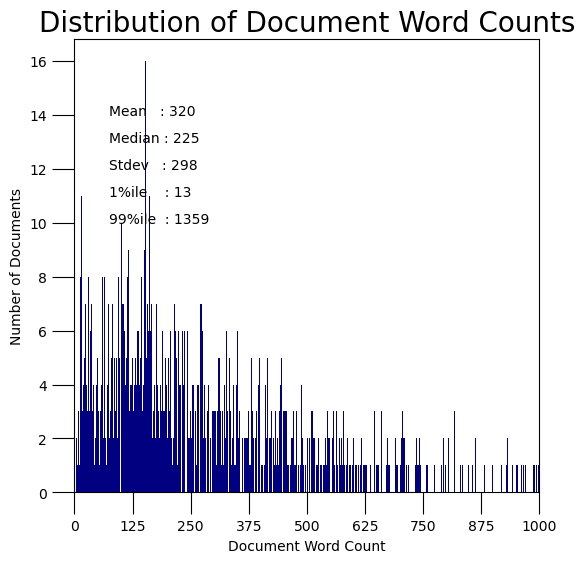

In [44]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(6,6), dpi=100)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(75, 14,"Mean   : " + str(round(np.mean(doc_lens))))
plt.text(75, 13, "Median : " + str(round(np.median(doc_lens))))
plt.text(75, 12, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(75, 11, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(75, 10, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=20))
plt.show()

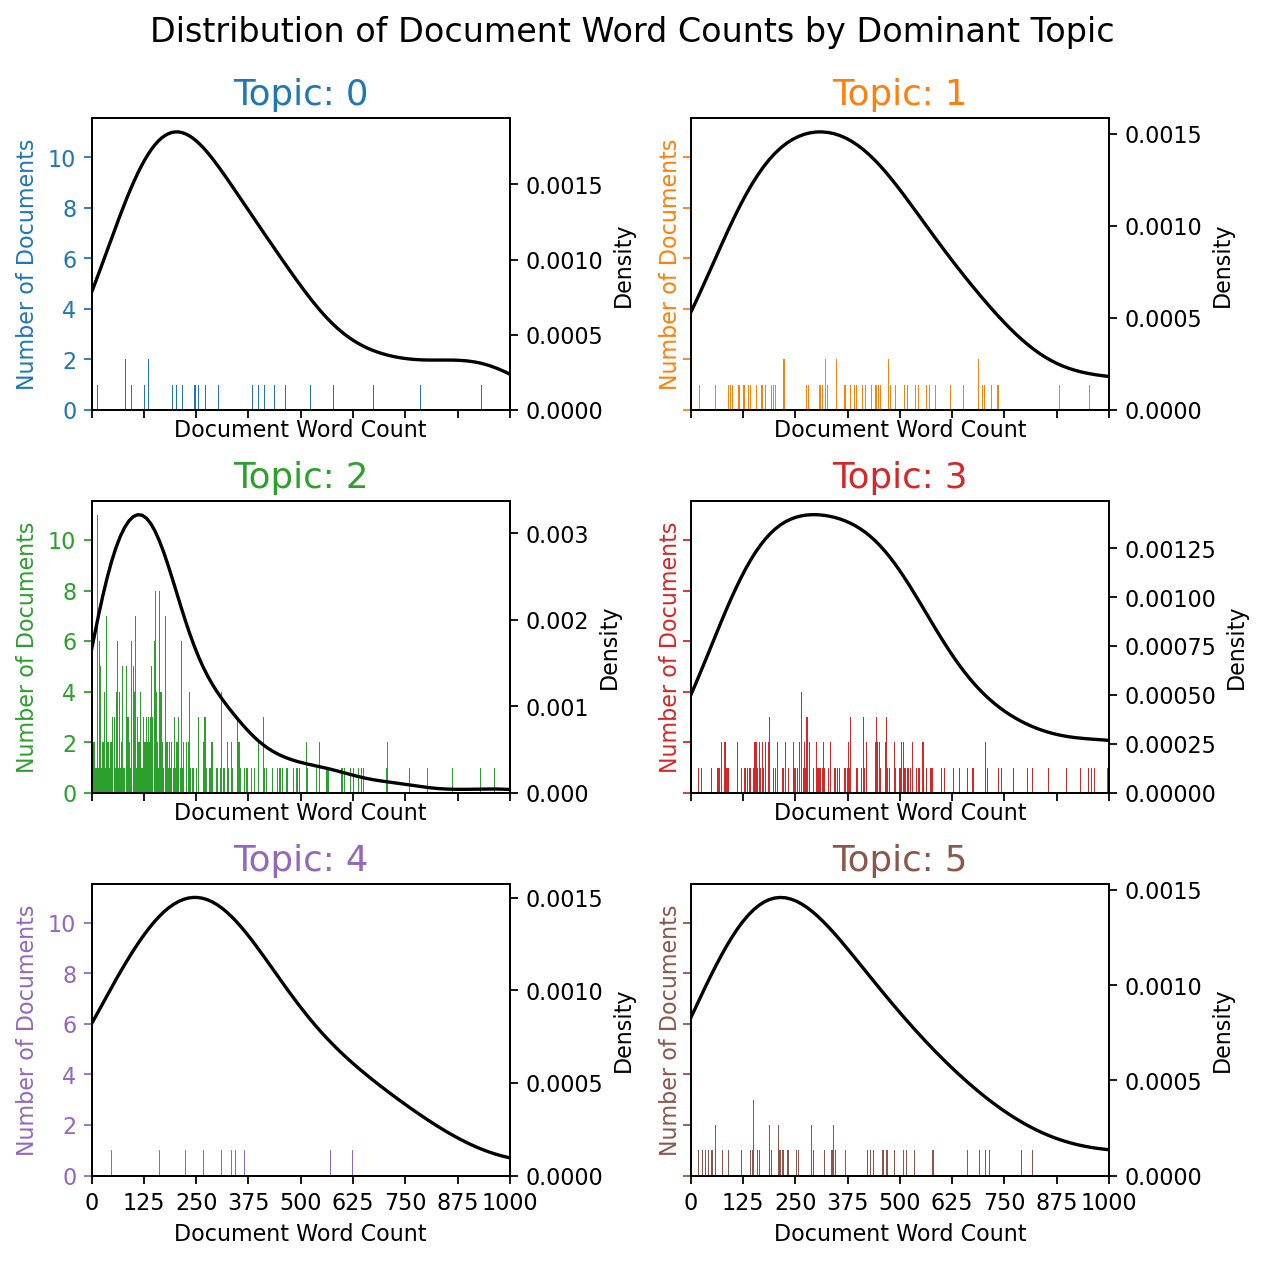

In [47]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(3,2,figsize=(8,8), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=15)
plt.show()

# 9. Word Clouds of Top N Keywords in Each Topic

Though you’ve already seen what are the topic keywords in each topic, a word cloud with the size of the words proportional to the weight is a pleasant sight. The coloring of the topics I’ve taken here is followed in the subsequent plots as well.

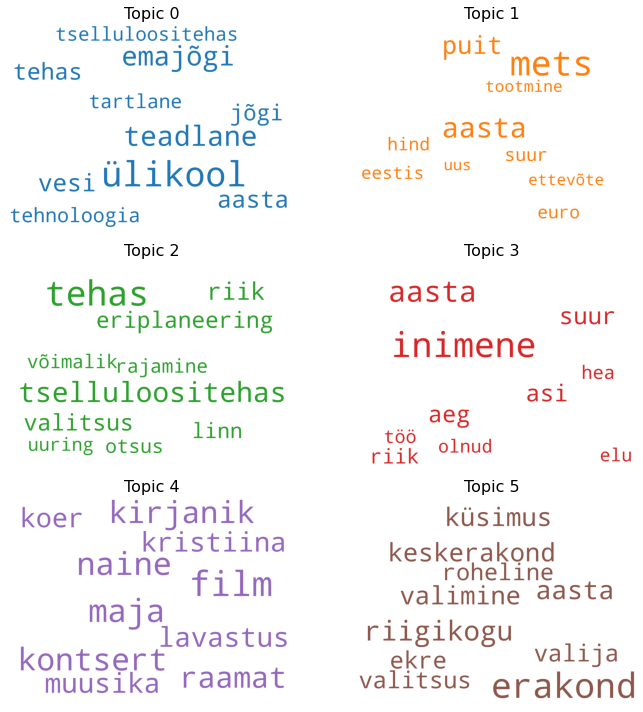

In [48]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel2b.show_topics(formatted=False)

fig, axes = plt.subplots(3, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# 10. Word Counts of Topic Keywords

When it comes to the keywords in the topics, the importance (weights) of the keywords matters. Along with that, how frequently the words have appeared in the documents is also interesting to look.

Let’s plot the word counts and the weights of each keyword in the same chart.
You want to keep an eye out on the words that occur in multiple topics and the ones whose relative frequency is more than the weight. Often such words turn out to be less important. The chart I’ve drawn below is a result of adding several such words to the stop words list in the beginning and re-running the training process.

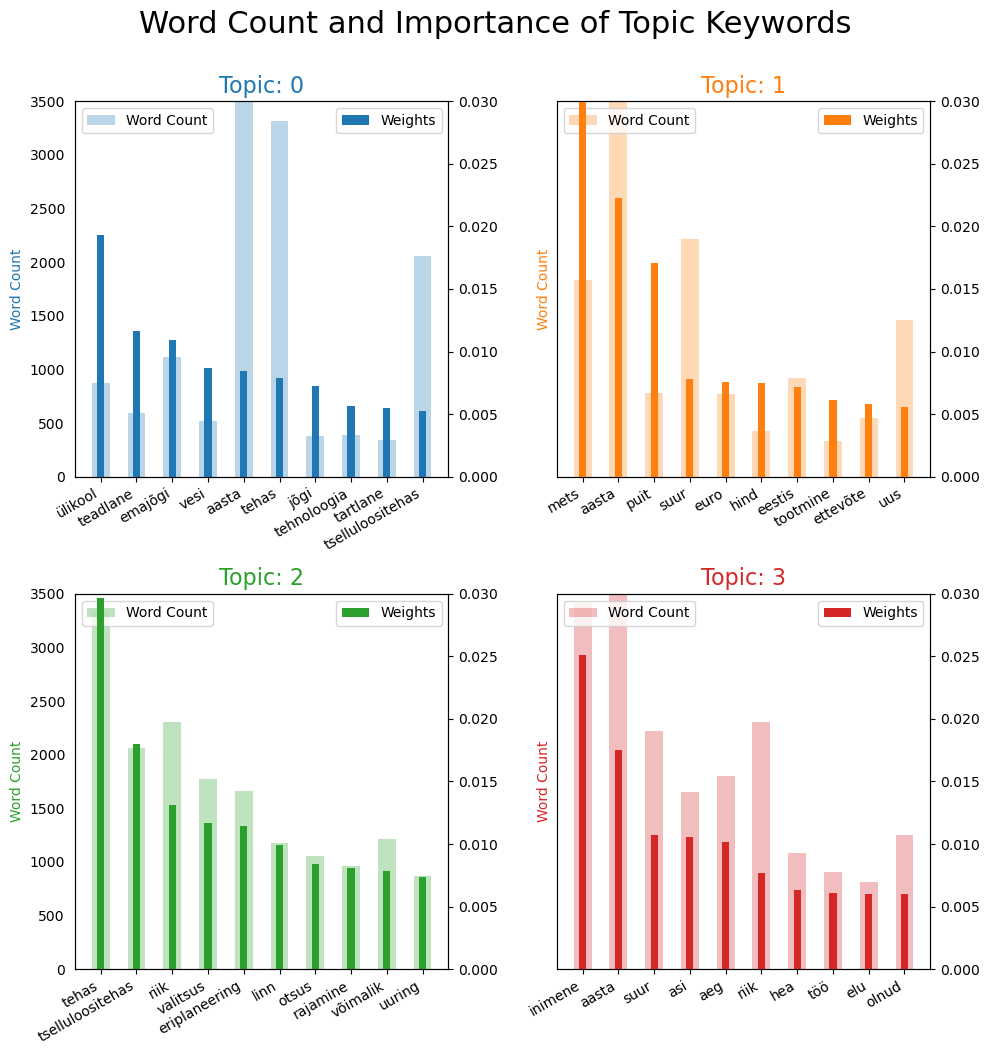

In [49]:
from collections import Counter
topics = ldamodel2b.show_topics(formatted=False)
data_flat = [w for w_list in data_lemmad for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(10,10), sharey=True, dpi=100)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()